# Counting Sort 

Explanation of counting sort functionality and demonstration of their lineal magnitude order.

---
![Universidad de Antioquia](https://vias.ciiisol.com/images/LogoFacultaddeIngenieria-verde.png)



## Departamento de Ingeniería de Sistemas
### Estructuras de Datos
#### 2021-1

---

> *Juan Cardona* 

## Developer

**Harold H. Seward** computer scientist, engineer and inventor.

**Seward** developed the *radix sort* and *counting sort* algorithms in 1954 at MIT.

![Harold H Seward](https://currentobitwebstorage.blob.core.windows.net/067/06822c877d864c47b0b15c7005b30790.jpg)

Born:	*July 24, 1930*

Died:	*June 19, 2012* (aged 81)

He also worked on the *Whirlwind Computer* (it was among the first digital electronic computers that operated in real-time for output) and developed instruments that powered the guidance systems for the Apollo spacecraft and Polaris missile.




## Introducing Counting Sort

### What is counting sort?

It is a sorting algorithm where all the input in the input $array$ are positive integers.

Counting sort assumes that each element in the input $array$ has a value ranging from $minValue$ to $maxValue$.

- $array$
- $minValue$
- $maxValue$



In [8]:
import numpy.random as rdm

# create one random input array
arr = list(rdm.randint(190,size = 7)) 

# get the minimum value in the input array 
minValue = min(arr)

# get the maximum value in the input array
maxValue = max(arr) 

print('array = '+str(arr))
print('minValue = '+ str(minValue))
print('maxValue = '+ str(maxValue))
# print('---this cell runs 3n times')

array = [89, 101, 69, 181, 162, 77, 143]
minValue = 69
maxValue = 181


### Functionality

Counting sorts is a special sorting algorithm that runs in linear time

* $O(n+k)$

with respect to two variables:

1. The length of the input $array$

- $n = length(array)$

2. The distance betwen the $minValue$ and the $maxValue$

- $k = maxValue - minValue + 1$

In [12]:
# get the length of the input array
n = len(arr) 

# get the distance between the minValue and the maxValue
k = maxValue - minValue + 1 

print('n = '+str(n))
print('k = '+ str(k))
# print('---this cell runs n+1 times')

n = 7
k = 113


For each element in the $array$, counting sort map it as the index of the $temporal$ array and increasing in 1 the corresponding value.
- $temporal=[0,0,0, \dots, k]$

In [3]:
# create the temporal array
temporal = [0]*k 

# fill the temporal array with the occurrences of each value in the input array
for value in arr:
    temporal[value - minValue]+=1  

print('temporal = ' +str(temporal))
# print('---this cell runs k+n times')
# print(sum(temporal)==n)

temporal = [1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1]
True


Finally counting sort use the $temporal$ array index to place the element directly into the correct slot in the $solution$ array.

- $solution=[0,0,0, \dots, n]$

In [4]:
# create the soution array
solution = []

# fill the solution array with the index on the temporal array if the value in it, it's different to 0
for i in range(len(temporal)):
    while temporal[i]>0:
        solution.append(i+minValue)
        temporal[i]-=1

print('solution = '+ str(solution))  

# print('---this cell runs 1+k+n times')

solution = [3, 4, 5, 9, 10, 15, 16]


I want to graph an array with points in the form $(n+k, O(n+k))$, with $n$ increasiong, so i define the next function to perform the counting sort for $n$ variable and return the value of $n + k$.


## $O(n+k)$
### Demonstration of the magnitude order

First I'll get all the times that each cell was executed and then I'll define the magnitud order function for the code i wrote. 

### Cell 1 iterations $\sum_{i=1}^{n} 1 +\sum_{i=1}^{n} 1 +\sum_{i=1}^{n} 1 = 3n$
### Cell 2 iterations $(\sum_{i=1}^{n} 1 )+ 1 = n +1$
### Cell 3 iterations $\sum_{i=1}^{k} 1 + \sum_{i=1}^{n} 1 = k+n$
### Cell 4 iterations $1 + \sum_{i=1}^{k} 1+ \sum_{i=1}^{n} 1 = 1+k+n$

$O(n+k) = \sum_{i=1}^{n} 1 +\sum_{i=1}^{n} 1 +\sum_{i=1}^{n} 1 + (\sum_{i=1}^{n} 1 )+ 1 + \sum_{i=1}^{k} 1 + (\sum_{i=1}^{n} 1) + 1 + \sum_{i=1}^{k} 1+ \sum_{i=1}^{n} 1 $

$O(n+k) = 3n+n+1+k+n+1+k+n $

$O(n+k) = 6n+2k+2$

In [14]:
def countingSorn (n):
    import numpy.random as rdm
    
    # create one random input array
    arr = list(rdm.randint(n**2, size = n))

    # get the minimum value in the input array 
    minValue = min(arr)

    # get the maximum value in the input array
    maxValue = max(arr)

    # get the length of the input array
    n = len(arr) 

    # get the distance between the minValue and the maxValue
    k = maxValue - minValue + 1 

    # create the temporal array
    temporal = [0]*k 

    # fill the temporal array with the occurrences of each value in the input array
    for value in arr:
        temporal[value - minValue]+=1  

    # create the soution array
    solution = []

    # fill the solution array with the index on the temporal array if the value in it, it's different to 0
    for i in range(len(temporal)):
        while temporal[i]>0:
            solution.append(i+minValue)
            temporal[i]-=1

    # return an array tith the time of execution and the sum n + k 
    return n+k


Finally I creste 2 arrays: 
- $timer = [O(n_1 + k_1)_1, ..., O(n_i + k_i)_i], i \in [1, n]$ for each time that take the run of the counting sort for each $nk = [(n_1 + k_1), ..., (n_i + k_i)]$

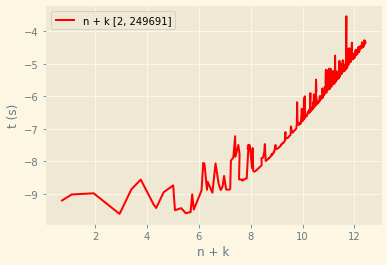

In [20]:
import matplotlib.pyplot as plt
plt.style.use('Solarize_Light2')
import numpy as np

# create array to fill it with the time of execution
timer = []
# create array to fill it with the value of each n + k
nk = []

# create linear space to map the counting sort and give a continuous grid layer
n_set = np.linspace(1, 500, 400).astype(int)

# run the counting sort 20 times to fill the arrays
for n in n_set:
        
    t = %timeit -o -q -r 1 -n 1 nk.append(countingSorn(n))
    timer.append(t.worst)

# plot the arrays to see the results
plt.xlabel("n + k")
plt.ylabel("t (s)")
plt.plot(np.log(nk), np.log(timer), color="red")
plt.legend([f"n + k [{nk[0]}, {nk[-1]}]"], loc="upper left")
